# The Central Limit Theorem - Teorema del Limite Centrale

 <h1>📚 <mark>Introduction to the CLT </mark> </h1>

`Il teorema del limite centrale` insieme alla legge dei grandi numeri è uno dei teoremi fondamentali in statistica e probabilità. 

**Esso afferma infatti che la distribuzione della media campionaria è normale a condizione che l'ampiezza del campione sia sufficientemente grande, solitamente >=30.**

<mark>Questo vuol dire che se estraiamo in maniera casuale una serie di n.campioni di grandezza >=30 dalla popolazione di partenza e calcoliamo la media dei valori per ciascun campione, le medie che otterremo si distribuiranno seguendo la forma della Distribuzione Normale.</mark>

<u>Questo avviene indipendentemente dalla distribuzione della popolazione di partenza.</u>

**Sapendo infatti che la distribuzione della media campionaria è normale possiamo mettere in pratica la regola empirica della distribuzione normale:**

`Il 68,26% dei valori è compreso fra -1 e +1 deviazioni standard.`

`Il 95,44% dei valori è compreso fra -2 e +2 deviazioni standard.` 

`Il 99,73% dei valori è compreso fra -3 e +3 deviazioni standard.` 

Un'area di probabilità del 95% è compresa fra -1.96 e +1.96 deviazioni standard. 

Un'area di probabilità del 99% è compresa fra -2.576 e + 2.576 deviazioni standard. 


* Data una popolazione, consideriamo una feature (esempio: altezza, peso, stipendio, etc...) per ogni individuo.


**Qualsiasi sia la forma della distribuzione di partenza (popolazione)** la distribuzione delle medie dei campioni presi dalla popolazione tenderà ad una distribuzione normale.

* `the mean of the means` = $ \mu$ (Law of Large Numbers)
* `the standard deviation of the means` = $ \frac{\sigma}{\sqrt{n}} $  (Central Limit Theorem)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)


$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

👩🏻‍🔬  Let's verify this experimentally!

<img src="https://miro.medium.com/max/1400/1*Mk6EV8oIB1jlbQWcRzNRdg.png" alt="350" width="700" align="left"/>



---

## 🔢  2) The Dataset

We will use the `tips` dataset from the `seaborn` library to illustrate the Central Limit Theorem.

In [18]:
# --- Data Manipulation ---
import numpy as np
import pandas as pd

# --- Data Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Maths ---
import math
import scipy as stats

In [19]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


###  2.1) Exploratory Data Analysis (EDA)

❓ How many rows are available in the dataset ❓

In [20]:
tips_df.shape[0]  #244 rows (observations)

244

❓ Plot the distribution of the `tip` column 📊 (with 20 bins) ❓

<AxesSubplot:xlabel='tip', ylabel='Count'>

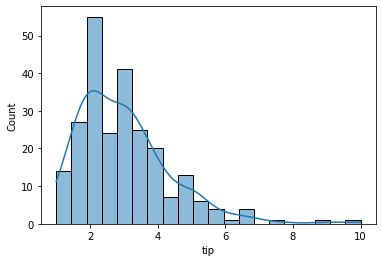

In [21]:
sns.histplot(tips_df['tip'], kde=True, bins = 20)

❓ What are : ❓
* the ***average tip***
* the ***standard deviation tip*** 
* the  [***skewness of the tips***](https://whatis.techtarget.com/definition/skewness) (indice di asimmetria)


In [22]:
mu = tips_df['tip'].mean() #media delle tips

print('Mean:', mu)

sd = tips_df['tip'].std() #deviazione standard delle tips

print('Standard Deviation:', sd)

skewness = 'right'  #asimmetria a destra in questo caso

print('Skewness:', skewness) 

Mean: 2.9982786885245902
Standard Deviation: 1.3836381890011826
Skewness: right


In [23]:
tips_df.tip.describe() #statistics summary

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

* the "mode" seems to be around 2 dollars `(we can't really talk about a mode for a continuous variable but just looking at the histogram with 20 bins, we can give an estimation)
    
* the "mean" is at 2.99 dollars
    
* the median is at 2.90 dollars
    
So here we have $ mode < median < mean $ which correspond to a `right skewness` 

<h1> <mark> Applying the CLT</mark></h1>

### 3.1) <u>Graphically</u>

* `N` (how many times we sample) controls the random noise. 

* `n` (sample size) controls the shape of the distribution. 

**When n is large enough, it *converges* towards a Normal distribution. This is the Central Limit Theorem.**



<AxesSubplot:ylabel='Count'>

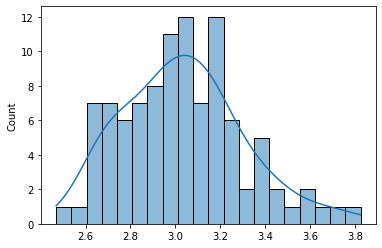

In [46]:
n = 30 # CLT applies mostly with n>=30
N = 100

means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20, kde=True)

### 3.2) <u>Numerically</u>

❓ Let's verify the Central Limit Theorem computationally ❓
- Compare `mu` with the mean of means
- Compare `sd` with the standard deviation of the means, but don't forget the $\sqrt n$ adjustment
- Compute the `skewness` of the distribution of the means using `scipy.stats.skew` (should be close to 0)

In [25]:
from scipy.stats import skew

index_df = ['mean', 'stdev','skewness']

theory = [mu, sd/np.sqrt(n), 0]

real_life = [np.mean(means), np.std(means), skew(means)] 

comparison_df = pd.DataFrame(list(zip(theory,real_life)), 
                             columns = ["CLT Theory","Real Tips"],
                             index = index_df)
round(comparison_df,2)

,CLT Theory,Real Tips
mean,3.00,2.97
stdev,0.25,0.25
skewness,0.00,0.06


<img src="https://media.istockphoto.com/vectors/congratulations-greeting-sign-congrats-graduated-vector-id1148641884?k=20&m=1148641884&s=170667a&w=0&h=UZvEyiD5nxDJiLz5n0i1jdvWn-MR6wt1nomiPV1wSDE=" alt="400" width="500" align="left"/>